<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

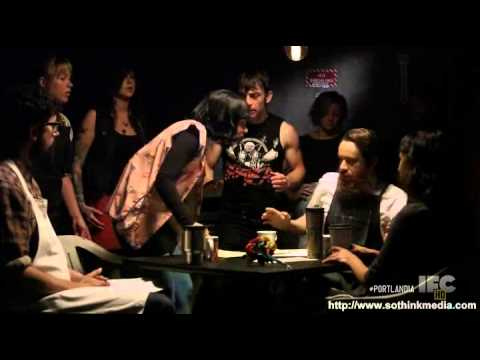

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [17]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [18]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [27]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [45]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [19]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [20]:
shops['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [21]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


In [24]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [25]:
shops.tokens.head()

0    [ , 11/25/2016, 1, check, love, love, loved, a...
1    [ , 12/2/2016, listed, date, night, austin, am...
2    [ , 11/30/2016, 1, check, listed, brunch, spot...
3    [ , 11/25/2016, cool, decor, good, drinks, nic...
4    [ , 12/3/2016, 1, check, located, northcross, ...
Name: tokens, dtype: object

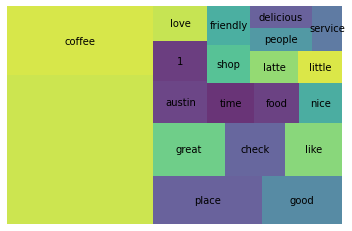

In [28]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [85]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','1', 'austin', 'shop', 'coffee', 'place', 'Yelp', '$'])

In [86]:
tokens = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

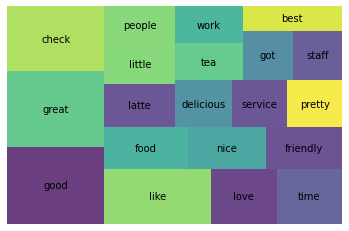

In [87]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [88]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

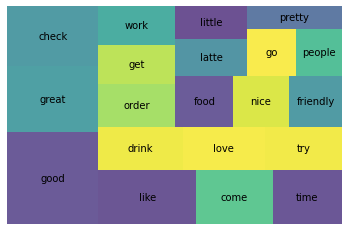

In [89]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Up to this point, I was trying to get the tokens into an acceptable form. From here on, I will split the dataframe into two: good_shops (where star_rating >= 4) and bad_shops (where star_rating is between 1 and 3), then I will apply the final lemmatization to both the new dataframes.

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [90]:
five_star_shops = shops[shops['star_rating'] == ' 5.0 star rating '].copy()
four_star_shops = shops[shops['star_rating'] == ' 4.0 star rating '].copy()
good_shops = five_star_shops.append(four_star_shops)
good_shops.sample(10)

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
1406,Caffe Medici,4/25/2014 1 check-in Cool atmosphere in a cut...,4.0 star rating,"[4/25/2014, check, cool, atmosphere, cute, ret...","[4/25/2014, check, cool, atmosphere, cute, ret..."
6948,La Patisserie,3/17/2014 4 check-ins Listed in Yelp 100 Chal...,5.0 star rating,"[3/17/2014, 4, check, ins, listed, yelp, 100, ...","[3/17/2014, 4, check, in, list, Yelp, 100, cha..."
522,Monkey Nest Coffee,"12/7/2015 1 check-in Great place to study, 24...",5.0 star rating,"[12/7/2015, check, great, study, 24/7, great, ...","[12/7/2015, check, great, study, great, good, ..."
2535,Flightpath Coffeehouse,"11/7/2016 1 check-in Good place to study, how...",4.0 star rating,"[11/7/2016, check, good, study, weekends, toma...","[11/7/2016, check, good, study, weekend, tomat..."
2507,Caffé Medici,3/23/2015 My quest for a decent cup of coffee...,5.0 star rating,"[3/23/2015, quest, decent, cup, downtown, star...","[3/23/2015, quest, decent, cup, downtown, star..."
2129,Houndstooth Coffee,3/16/2016 Great Americano and fast service.,4.0 star rating,"[3/16/2016, great, americano, fast, service]","[3/16/2016, Great, Americano, fast, service]"
3819,Cream Whiskers,4/1/2016 Delicious and light matcha cream puf...,5.0 star rating,"[4/1/2016, delicious, light, matcha, cream, pu...","[4/1/2016, Delicious, light, matcha, cream, pu..."
679,Corona Coffee,"11/1/2014 The vibe is so chill here, I'm thin...",5.0 star rating,"[11/1/2014, vibe, chill, thinking, bring, pill...","[11/1/2014, vibe, chill, think, bring, pillow,..."
2963,Thunderbird Coffee,8/13/2015 Thunderbird Coffee is an Austin sta...,4.0 star rating,"[8/13/2015, thunderbird, staple, worth, campin...","[8/13/2015, Thunderbird, staple, worth, camp, ..."
5286,Genuine Joe,8/19/2013 72 check-ins Oh man! Guess where I...,4.0 star rating,"[8/19/2013, 72, check, ins, oh, man, guess, wa...","[8/19/2013, 72, check, in, oh, man, guess, way..."


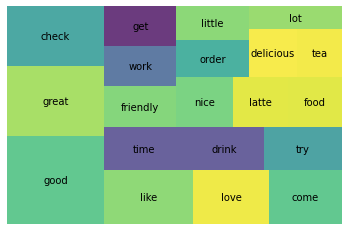

In [91]:
wc = count(good_shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

So we see for Good rated coffee shops, the above visualization shows the top 20 words/tokens used in reviews.

In [92]:
three_star_shops = shops[shops['star_rating'] == ' 3.0 star rating '].copy()
two_star_shops = shops[shops['star_rating'] == ' 2.0 star rating '].copy()
one_star_shops = shops[shops['star_rating'] == ' 1.0 star rating '].copy()
bad_shops = three_star_shops.append(two_star_shops)
bad_shops = bad_shops.append(one_star_shops)
bad_shops.sample(10)

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
6757,Alta’s Cafe,3/27/2015 More of a 3.5... Go here for the sn...,3.0 star rating,"[3/27/2015, 3.5, snacks, view, bring, lots, pa...","[3/27/2015, 3.5, snack, view, bring, lot, pati..."
3168,Cherrywood Coffeehouse,10/10/2016 1 check-in Came here on a whim and...,3.0 star rating,"[10/10/2016, check, came, whim, wanted, like, ...","[10/10/2016, check, come, whim, want, like, re..."
311,Mozart’s Coffee Roasters,12/30/2015 Have not been there in 20 years. ...,2.0 star rating,"[12/30/2015, 20, years, baristas, grumpy, atti...","[12/30/2015, 20, year, barista, grumpy, attitu..."
2691,Bennu Coffee,12/1/2016 We had an early drive and so came t...,2.0 star rating,"[12/1/2016, early, drive, came, places, open, ...","[12/1/2016, early, drive, come, place, open, 6..."
1167,Houndstooth Coffee,10/14/2016 1 check-in I would love to give Ho...,3.0 star rating,"[10/14/2016, check, love, houndstooth, 4, star...","[10/14/2016, check, love, Houndstooth, 4, star..."
5568,Dominican Joe,"7/31/2016 The coffee is fairly good, and they...",3.0 star rating,"[7/31/2016, fairly, good, taco, deli, breakfas...","[7/31/2016, fairly, good, Taco, Deli, breakfas..."
7259,Emerald Tavern Games & Cafe,3/13/2016 An out of town friend recommended t...,3.0 star rating,"[3/13/2016, town, friend, recommended, fiancee...","[3/13/2016, town, friend, recommend, fiancee, ..."
133,Vintage Heart Coffee,8/21/2016 1 check-in Only had a cup of cold b...,3.0 star rating,"[8/21/2016, check, cup, cold, brew, special, s...","[8/21/2016, check, cup, cold, brew, special, s..."
6328,Pacha,6/13/2015 1 check-in Breakfast is wildly over...,2.0 star rating,"[6/13/2015, check, breakfast, wildly, overpric...","[6/13/2015, check, Breakfast, wildly, overpric..."
4866,The Buzz Mill,11/15/2016 Filthy restrooms-not gender specif...,1.0 star rating,"[11/15/2016, filthy, restrooms, gender, specif...","[11/15/2016, filthy, restroom, gender, specifi..."


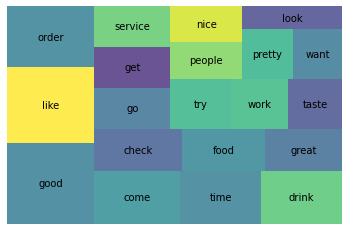

In [93]:
wc = count(bad_shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

And here we see the above visualization for Bad rated coffee shops, showing again the top 20 words/tokens used in reviews.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

